In [2]:
# picking up features, and passing the features to the dense neural network
# this will find features in all places, and find patterns in all places not just one specific area
# it will look for features, and then use a mapping of those features to look for more features, and build it up.

# this will load datasets with airplanes, automobiles, birds, cats, etc. It will use feature recognition to build the neural network

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(trainImages, trainLabels), (testImages, testLabels) = datasets.cifar10.load_data()

trainImages = trainImages / 255
testImages = testImages / 255

In [4]:
classNames = ["airplanes", 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)


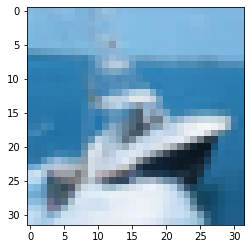

In [5]:
# there are 50000 images, 32x32 each
print(trainImages.shape)
plt.imshow(trainImages[8])

In [6]:
# adding a model
model = models.Sequential()
# input shape will be 32 by 32 by 3 (three colors) and the activation function will be relu
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)))
# we will pool the features into a 15x15 grid (from 30x30, as there was no padding earlier)
model.add(layers.MaxPooling2D((2,2)))
# then we do the same thing and look for features in the 15x15 grid, and we can use 64 filters as the image is smaller so computationally we can afford it
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# then again, we will pool it from 13x13 to now 6x6
model.add(layers.MaxPooling2D((2,2)))
# finally we will look for filters one last time
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# the 'stack'
# from here we will pass the model to a dense neural network. based on the features present we will put it through a dense layer as before
# model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# from here we should have a resulting 10 nodes that can tell us what picture we are looking at

In [7]:
model.summary()

# the first bit is the convolutional base and the second bit is the dense neural network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(trainImages, trainLabels, epochs=5, validation_data=(testImages, testLabels))

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5497 - accuracy: 0.4358 - val_loss: 1.2918 - val_accuracy: 0.5361
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1802 - accuracy: 0.5818 - val_loss: 1.0493 - val_accuracy: 0.6328
Epoch 3/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0040 - accuracy: 0.6496 - val_loss: 1.0323 - val_accuracy: 0.6338
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9034 - accuracy: 0.6818 - val_loss: 0.9464 - val_accuracy: 0.6677
Epoch 5/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8356 - accuracy: 0.7088 - val_loss: 0.9185 - val_accuracy: 0.6795


In [9]:
testLoss, testAccuracy = model.evaluate(testImages, testLabels, verbose = 1)
# 68.9 percent accurate in 5 epochs, not bad
print(testAccuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.9185 - accuracy: 0.6795
0.6794999837875366


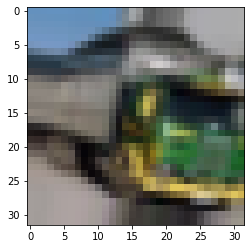

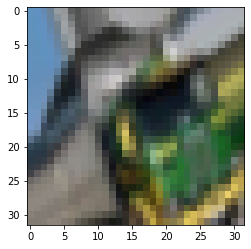

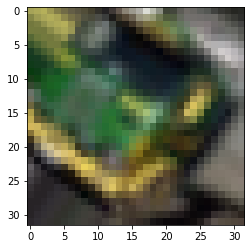

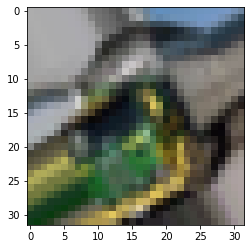

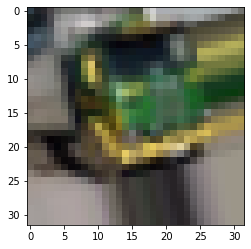

In [10]:
# DATA AUGMENTATION
# if we stretch, compress and rotate etc images, we can generalize the patterns that the model needs to find.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

testImage = trainImages[14]
img = image.img_to_array(testImage) # convert to np array
img = img.reshape((1,) + img.shape) # reshape the image

i = 0

# batch is the image, and we will datagen it to resize it
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break